In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from PIL import Image

01) Dados da Sala de Aula em situação vazia:

In [13]:
# Velocidade sonora a 20*C
SOUNDSPEED = 343

# Dimensões da sala em metros
comprimento = 5.89
largura = 8.50
altura = 3.26

# areas em m²
janela = 5.58
porta = 1.94
quadro = 5.45

# Dados dos alunos, professores, tela e mesas
alunos_area = 30 
professores_area = 1 
tela_area = 5.6
mesas_area = 2

02) Calculo de Área total (S)  

In [14]:
# Áreas Superficies
parede_lateral = (comprimento * altura) * 2
parede_fundo = (largura * altura) - janela
parede_frente = (largura * altura) - porta
piso = largura * comprimento
teto = largura * comprimento
volume = comprimento * largura * altura
area_Total_Superficies = parede_lateral + parede_fundo + parede_frente + piso + teto + porta + janela
print(f"A area total das Superficies será: S = {area_Total_Superficies:.2f} m²", )

A area total das Superficies será: S = 193.95 m²


03) Criação de um Dataframe preliminar com informações da Sala

In [15]:
dados = {
    "Áreas": ["Parede Lateral", "Parede Fundo", "Parede Frente", "Piso", "Teto", "Porta", "Janela", "Alunos Sentados", "Professor", "Tela", "Mobiliario"],
    "Superfícies (m²)": [parede_lateral, parede_fundo, parede_frente, piso, teto, porta, janela, alunos_area, professores_area, tela_area, mesas_area],
    "Material":  ["Parede Pintada", "Parede Pintada", "Parede Pintada", "Piso Cerâmico", "Parede Pintada", "Porta", "Vidro", "Alunos", "Professor", "Tela", "Mesa"]
    
}

df = pd.DataFrame(dados)
print("---------------------------------------------------")
print(df)
print("---------------------------------------------------")

---------------------------------------------------
              Áreas  Superfícies (m²)        Material
0    Parede Lateral           38.4028  Parede Pintada
1      Parede Fundo           22.1300  Parede Pintada
2     Parede Frente           25.7700  Parede Pintada
3              Piso           50.0650   Piso Cerâmico
4              Teto           50.0650  Parede Pintada
5             Porta            1.9400           Porta
6            Janela            5.5800           Vidro
7   Alunos Sentados           30.0000          Alunos
8         Professor            1.0000       Professor
9              Tela            5.6000            Tela
10       Mobiliario            2.0000            Mesa
---------------------------------------------------


04) Frequências sonoras

In [16]:
frequencias = [125, 250, 500, 1000, 2000, 4000]

05) Inserção de dados dos Coeficientes de absorção dos materiais

In [17]:
mean_alpha = {
    "Piso Cerâmico": {125: 0.01, 250: 0.01, 500: 0.01, 1000: 0.02, 2000: 0.02, 4000: 0.02},
    "Parede Pintada": {125: 0.14, 250: 0.10,  500: 0.06, 1000: 0.05, 2000: 0.04, 4000: 0.03},
    "Porta": {125: 0.05, 250: 0.00, 500: 0.03, 1000: 0.00, 2000: 0.03, 4000: 0.00},
    "Vidro": {125: 0.10, 250: 0.00, 500: 0.04, 1000: 0.00, 2000: 0.02, 4000: 0.00},
    "Alunos": {125:0.20, 250:0.28, 500:0.32, 1000:0.37,	2000:0.41, 4000:0.44},
    "Professor": {125:0.19,	250:0.33, 500:0.44, 1000:0.42, 2000:0.46,	4000:0.37},
    "Tela": {125:0.20, 250:0.00, 500:0.50, 1000:0.40, 2000:0.60, 4000:0.00},
    "Mesa": {125:0.04, 250:0.04, 500:0.04, 1000:0.04, 2000:0.04, 4000:0.04}
}

# Adicionar nessa tabela aqui embaixo outros materiais

coeficientes_df = pd.DataFrame(mean_alpha)
print("---------------------------------------------------")
print(coeficientes_df)
print("---------------------------------------------------")


---------------------------------------------------
      Piso Cerâmico  Parede Pintada  Porta  Vidro  Alunos  Professor  Tela  \
125            0.01            0.14   0.05   0.10    0.20       0.19   0.2   
250            0.01            0.10   0.00   0.00    0.28       0.33   0.0   
500            0.01            0.06   0.03   0.04    0.32       0.44   0.5   
1000           0.02            0.05   0.00   0.00    0.37       0.42   0.4   
2000           0.02            0.04   0.03   0.02    0.41       0.46   0.6   
4000           0.02            0.03   0.00   0.00    0.44       0.37   0.0   

      Mesa  
125   0.04  
250   0.04  
500   0.04  
1000  0.04  
2000  0.04  
4000  0.04  
---------------------------------------------------


06) Média ponderada para cada material

In [29]:
def calculo_media_ponderada(material, frequencias, mean_alpha):
    media_ponderada = 0
    
    for freq in frequencias:
        media_ponderada += mean_alpha[material][freq]
        
    return media_ponderada / len(frequencias)

07) Média ponderada para cada linha do DataFrame


In [ ]:
medias_ponderadas = []

for material in dados["Material"]:
    media_ponderada = calculo_media_ponderada(material, frequencias, mean_alpha)
    medias_ponderadas.append(media_ponderada)

In [ ]:
dados["NRC"] = medias_ponderadas
df = pd.DataFrame(dados)
print(df)

08) Calculo da absorção para cada área em cada frequência

In [ ]:
absorcao_por_area = {} 

for index, row in df.iterrows():
    area = row["Superfícies (m²)"]
    material = row["Material"]
    coeficientes_material = mean_alpha[material]
    
    absorcao_por_frequencia = []
    for freq in frequencias:
        absorcao = area * coeficientes_material[freq]
        absorcao_por_frequencia.append(absorcao)
    
    absorcao_por_area[row["Áreas"]] = absorcao_por_frequencia
    
# Crie um novo DataFrame para armazenar a absorção por área em cada frequência
absorcao_df = pd.DataFrame(absorcao_por_area, index=frequencias).T

print("------------------------------------------------------------------------")
print("Absorção por área em cada frequência:")
print(absorcao_df)
print("------------------------------------------------------------------------")

09) Soma dos valores por coluna

In [33]:
soma_por_frequencia = absorcao_df.sum()

# Imprima os resultados
print("---------------------------------------------------")
print("Soma dos valores de cada coluna:")
print(soma_por_frequencia)
print("---------------------------------------------------")

---------------------------------------------------
Soma dos valores de cada coluna:
125     27.637142
250     22.947430
500     21.884118
1000    21.659690
2000    22.825812
4000    18.742334
dtype: float64
---------------------------------------------------


10) Calculo dp coeficiente de absorção médio em cada frequência


In [35]:
# Calcular o coeficiente de absorção médio em cada frequência
absorcao_medio_125 = soma_por_frequencia[125] / area_Total_Superficies
absorcao_medio_250 = soma_por_frequencia[250] / area_Total_Superficies
absorcao_medio_500 = soma_por_frequencia[500] / area_Total_Superficies
absorcao_medio_1000 = soma_por_frequencia[1000] / area_Total_Superficies
absorcao_medio_2000 = soma_por_frequencia[2000] / area_Total_Superficies
absorcao_medio_4000 = soma_por_frequencia[4000] / area_Total_Superficies

11. Criar um dicionário com os dados até o momento

In [36]:
# Criar um dicionário com os dados
dados = {
    "Frequência (Hz)": frequencias,
    "Soma": [
        soma_por_frequencia[125],
        soma_por_frequencia[250],
        soma_por_frequencia[500],
        soma_por_frequencia[1000],
        soma_por_frequencia[2000],
        soma_por_frequencia[4000]
    ],
    "Absorção Média": [
        absorcao_medio_125,
        absorcao_medio_250,
        absorcao_medio_500,
        absorcao_medio_1000,
        absorcao_medio_2000,
        absorcao_medio_4000
    ]
}

# Criar um novo DataFrame com os dados
novo_df = pd.DataFrame(dados)

# Imprimir o novo DataFrame
print("-----------------------------------------------------")
print("Novo DataFrame com Frequência, Soma e Absorção Média:")
print(novo_df)
print("-----------------------------------------------------")

-----------------------------------------------------
Novo DataFrame com Frequência, Soma e Absorção Média:
  Frequência (Hz)       Soma  Absorção Média
0             125  27.637142        0.142494
1             250  22.947430        0.118315
2             500  21.884118        0.112832
3            1000  21.659690        0.111675
4            2000  22.825812        0.117687
5            4000  18.742334        0.096633
-----------------------------------------------------


12) Rt60 Sabine

In [37]:
t60_125 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_125))
t60_250 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_250))
t60_500 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_500))
t60_1000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_1000))
t60_2000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_2000))
t60_4000 = 0.161 * (volume / (area_Total_Superficies * absorcao_medio_4000))


valores_sabine = [t60_125, t60_250, t60_500, t60_1000, t60_2000, t60_4000]

novo_df["Sabine"] = valores_sabine

print(novo_df)

  Frequência (Hz)       Soma  Absorção Média    Sabine
0             125  27.637142        0.142494  0.950790
1             250  22.947430        0.118315  1.145101
2             500  21.884118        0.112832  1.200739
3            1000  21.659690        0.111675  1.213181
4            2000  22.825812        0.117687  1.151202
5            4000  18.742334        0.096633  1.402019


13) Rt60 Norris-Eyring

In [38]:
t60_e_125 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_125))
t60_e_250 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_250))
t60_e_500 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_500))
t60_e_1000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_1000))
t60_e_2000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_2000))
t60_e_4000 = -(0.161 * volume) / (area_Total_Superficies * math.log(1 - absorcao_medio_4000))

valores_Eyring = [t60_e_125, t60_e_250, t60_e_500, t60_e_1000, t60_e_2000, t60_e_4000]

novo_df["Eyring"] = valores_Eyring

print(novo_df)

  Frequência (Hz)       Soma  Absorção Média    Sabine    Eyring
0             125  27.637142        0.142494  0.950790  0.881314
1             250  22.947430        0.118315  1.145101  1.075938
2             500  21.884118        0.112832  1.200739  1.131647
3            1000  21.659690        0.111675  1.213181  1.144103
4            2000  22.825812        0.117687  1.151202  1.082048
5            4000  18.742334        0.096633  1.402019  1.333131


14) Cria um Grafico

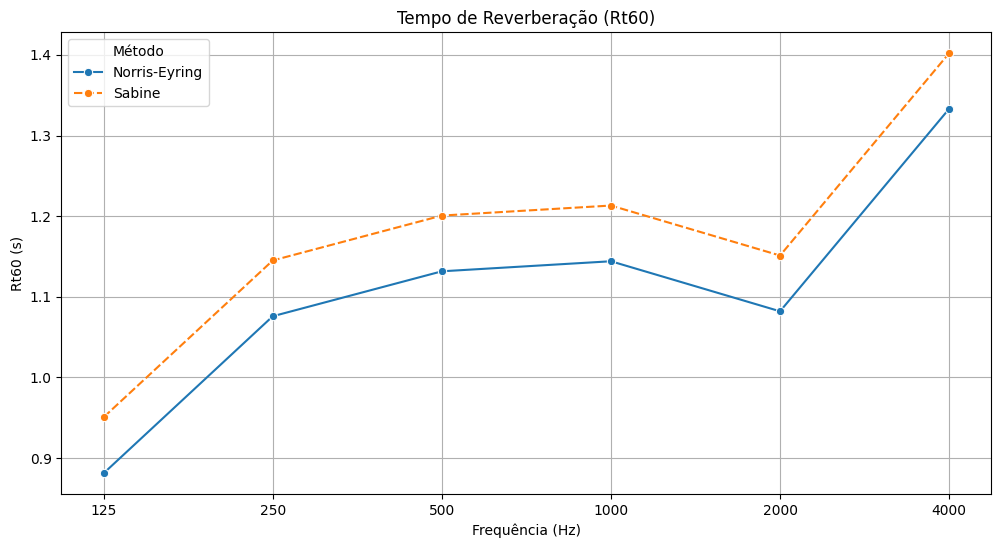

In [39]:
frequencias = ["125", "250", "500", "1000", "2000", "4000"]
t60_valores_1 = [t60_e_125, t60_e_250, t60_e_500, t60_e_1000, t60_e_2000, t60_e_4000]
t60_valores_2 = [t60_125, t60_250, t60_500, t60_1000, t60_2000, t60_4000]

dados = {
    "Frequência (Hz)": frequencias * 2,
    "T60 (s)": t60_valores_1 + t60_valores_2,
    "Método": ["Norris-Eyring"] * len(frequencias) + ["Sabine"] * len(frequencias)
}

df_plot = pd.DataFrame(dados)

plt.figure(figsize=(12, 6))
sns.lineplot(x="Frequência (Hz)", y="T60 (s)", hue="Método", marker="o", style="Método", data=df_plot)
plt.title('Tempo de Reverberação (Rt60)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Rt60 (s)')
plt.grid(True)
plt.show()

In [40]:
# Abra as imagens exportadas
imagem1 = Image.open('../Simulações/sala_atual_cheia.png')
imagem2 = Image.open('../Simulações/sala_atual_vazia.png')  # Altere para o nome do segundo arquivo de imagem

# Obtém o tamanho da imagem 1
largura_imagem1, altura_imagem1 = imagem1.size

# Obtém o tamanho da imagem 2
largura_imagem2, altura_imagem2 = imagem2.size

# Crie uma nova imagem com a largura total e a altura combinada
largura_total = largura_imagem1 + largura_imagem2
altura_total = max(altura_imagem1, altura_imagem2)
imagem_combinada = Image.new('RGB', (largura_total, altura_total))

# Cole as imagens na imagem combinada
imagem_combinada.paste(imagem1, (0, 0))
imagem_combinada.paste(imagem2, (largura_imagem1, 0))

# Salve a imagem combinada
imagem_combinada.save('graficos_combinados.png')

print('Gráficos combinados com sucesso!')

Gráficos combinados com sucesso!
